# Kmeans++

In [90]:
import pandas as pd
import numpy as np
from numpy import random
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib
import copy

In [77]:
#initialize first centroid
def init_centroid(test_data, samples, K):
    centroid = []
    rand = random.randint(samples)
    centroid.append(test_data[rand])
    return centroid

In [86]:
#calulate distance for each data point wrt centroid and select the max distance point as centroid
def cal_ini_centroid(test_data, centroid, K):
    for k in range (K-1):
        dist = []
        for i in range(samples):
            temp_dist = []
            for points in centroid:
                temp_dist.append(cal_eucledian(test_data[i], points, features))
            dist.append(temp_dist[np.argmin(temp_dist)])
        centroid.append (test_data[np.argmax(dist),:])
    return centroid

In [79]:
def cal_eucledian(test_data, centroid, features):
    sum=0
    for j in range(features):
        sum+= (test_data[j] - centroid[j])**2
    return sqrt(sum)
    

In [80]:
#calculate distance for all
def cal_dist(test_data, samples, centroid, features, K):
    dist = np.zeros((samples, K))
    for k in range(K):
        for i in range(samples):
            sum = 0
            for j in range(features):
                sum+= (test_data[i][j] - centroid[k][j])**2
            dist[i][k] = sqrt(sum)
    return dist

In [81]:
#calculate new centroid
def cal_centroid(dataset,K,centroid):
    for i in range(K):
        rows = np.where(dataset[:,2]==i)
        centroid[i] = np.reshape((np.mean(dataset[rows],axis=0)),(1,3))[:,[0,1]]
    return centroid

In [82]:
complete_customer_data = pd.read_csv('Mall_Customers.csv')

In [83]:
test_data = complete_customer_data.iloc[:,3:5]
samples, features = test_data.shape
test_data=test_data.to_numpy()

In [84]:
#mention no. of clusters
K = 5

In [101]:
centroid = init_centroid(test_data, samples, K)
centroid = np.array(cal_ini_centroid(test_data, centroid, K))
print(centroid)
dist = cal_dist(test_data, samples, centroid, features, K)
min_dist_index = np.reshape(np.argmin(dist, axis=1),(samples,1))
dataset = np.append(test_data,min_dist_index,axis=1)

for i in range(100):
    old_centroid = copy.deepcopy(centroid)
    dist = cal_dist(test_data, samples, centroid, features, K)
    min_dist_index = np.reshape(np.argmin(dist, axis=1),(samples,1))
    dataset = np.append(test_data,min_dist_index,axis=1)
    centroid = cal_centroid(dataset,K,centroid)
    if np.array_equal(old_centroid,centroid):
        print(i)
        break


[[ 61  49]
 [137  83]
 [120  16]
 [ 19  99]
 [ 19   3]]
4


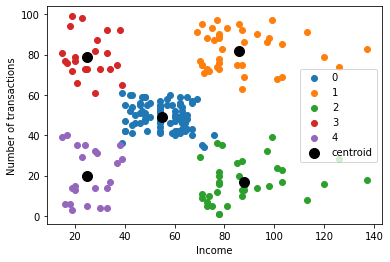

In [102]:
colors = ['red','green','blue','purple','pink']
for i in range(K):
    x=dataset[np.where(dataset[:,2]==i)]
    plt.scatter(x[:,0], x[:,1], label = i)
plt.scatter(centroid[:,0],centroid[:,1],s=100,c='black',label='centroid')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()